$$ \Large{\textbf{Digital Signal Processing and Deep Learning:  Environment Sound Classification }} $$   
$$ \large{\textbf{Part II: Wavelet transform and Convolutional Neural Networks}} $$

$$ \small{\textbf{Dr. Stéphane DEDIEU, Dec. 2022 - Jan. 2023 }} $$

# Introduction

<span style="color:#4169E1">  Automatic environmental sound classification (ESC) based on ESC-50 dataset (and ESC-10 subset) built by Karol Piczak and described in the following article: <br> 
<br>
In this notebook we apply complex continuous wavelet transforms to each audio clip and save scalograms magnitude <b>and</b> phase. <br> As a pre-processing technique, we select different types of complex wavelets for different types of noise. The selection is not automatic at the moment. We are just testing the principle. <br>
After training a Convolutionnal Neural Network on 2 series of 128x128 grayscale images: scalograms magnitude, scalograms phase, maximum accuracy= 94 %.  <br>
Promising. 
<br>  

# Methodology
<br>
<span style="color:#4169E1"> 

- In an effort to reduce the size of the problem and computation time, while retaining relevant information, we:  
    - reduce audio sampling frequency from 44.1 kHz to 22.05 kHz.     
    - reduce the size of audio clips, to 1.25s, based on signal power considerations. Too many audio clips have occurences of the same sound phenomenon: dog barking, baby crying for example and most of the signal is "silence". 
- Normalize audio signal amplitude to 1. (0 dBFS). 
- Plot wavelet transforms in the 10 classes, and empirically optimize wavelet selection. And wavelet transform parameters.
- Truncate scalogram magnitude [-40, +5] dB  and phase [-3000, +3000] rad for enhancing scalograms details !  
- Reduce the size of scalograms in the time domain (some details are lost).
- Train a CNN on 2 series of 128x128 grayscale scalograms: magnitude and phase. Train/Test split: 80/20 %. 

# Wavelet transforms
<br>
<span style="color:#4169E1">  
Wavelet selection: the difficulty here is the selection of the right wavelet suited to the full range of noise types: pseudo-stationary, non-stationary, transient/impulsive. <br>
<b>Applying different wavelets to each type of sound significantly improves CNN Deep Learning accuracy. Way above 90%. </b> <br> In this notebook we test the selection of different types of wavelets depending on the type of sound.  
<br>

In [3]:
import pywt
print('Wavelets families:', pywt.families(short=True))
print('   ')
wavlist = pywt.wavelist(kind='continuous')
print('Continuous wavelets:', wavlist)
print('Continuous wavelets set includes real and complex wavelets')

Wavelets families: ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
   
Continuous wavelets: ['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']
Continuous wavelets set includes real and complex wavelets


<span style="color:#4169E1"> For more flexibility, on scales, we select continuous wavelet transform (CWT). We will reduce the size of scalograms in the time domain, meaning that some details will be lost.   
    
<br>
<span style="color:#4169E1">    
    
- The default wavelet will be 'Complex Morlet', <code>cmor</code>.  
- Impulse detection: wavelet similar to "mexican hat" or 'bump' (does not seem to be implemented in pywt) tend to enhance scalogram amplitude on short transients. Complex Gaussian order 1:  <code> cgau1 </code>
- Stationary noise: rain, sea wave: In practice wavelet transform are intended to detect transients, non stationary phenomenons they are not well suited for stationary noise. We could just implement a different type of wavelet: dissymetric wavelet or gaussian that may discriminate stationary noise from other types.  Complex Gaussian order 5.  <code> cgau5 </code>
- (Pseudo-)stationary with harmonics: engine, rotor blades ... ideally we would like to detect thin band harmonics. At that point we apply the default wavelet.  

|<p align="center">   <img src="ESC10_Wavelet_Transform_Mag.png"  width="450"  /> </p> | <p align="center"> <img src="ESC10_Wavelet_Transform_Phase.png" width="450"  /> </p> |  
| :---       | :---       |   
|<p align="center"> <i> Scalograms Magnitude  </i> </p> | <p align="center"> <i> Scalograms Phase </i> </p> | 

<span style="color:#4169E1">  Scalogram phase exhibit interesting details particularly for sounds involving non-linear vibrations, resonance of vocal (or nasal) tract or cords and harmonics: dog barking, baby cry, person sneeze, rooster (non-stationary similar to speech). <br>
Also the clocktick. And confusion can occur here.... 

<div class="alert alert-block alert-info">
<b>Remark: The selection of various wavelets for different sound/noise categories is a pre-classification process ! </b><br>
<b> In this notebook the process is not automatic.</b> <br> We are just illustrating the fact that properly selecting wavelets, enhances the Convolutional Neural Networks accuracy way over 90%. 
</div>

<span style="color:#4169E1"> An algorithm: Automatic Wavelet Selection will be developped. And will be applied to each of the 400 audio clips.<br>
For each recording, best wavelet type can be selected: <br><br>

<span style="color:#4169E1">  
    
- either based on the analysis of time signals, with techniques used in Voice Activity Detection or Music classification: statistics, auto-correlation, zero-crossings, spectral centroids,... 
- or by testing different wavelet types with each recording and maximizing a criteria to be defined. 
    
This algorithm will be presented in a future work. 

#  Results

<span style="color:#4169E1">  The notebook is pretty long. We present results and conclusions here.  <br>
Details about methodology, wavelet selection, parameters of the Convolutional Neural Network are provided in context. <br> 
Without any pre-processing "optimization", generally CNN accuracy is around 80%.  
<b>With the methodology presented in this notebook, accuracy is between 90 to 94%. </b>  

|<p align="center">   <img src="Wavelet_Phase_94pc.png"  width="350"  /> </p> | <p align="center"> <img src="Wavelet_Phase_ConfusionMatrix_94pc.png" width="300"  /> </p> |  
| ---       | ---       |   
|<p align="center"> <i> Classification report </i> </p> | <p align="center"> <i> Confusion matrix </i> </p> | 

<span style="color:#4169E1"> Some confusion is likely to occur: <br>
   - with the non-stationnary, non-linear vocal tract sounds: baby cry/rooster, dog/rooster. 
   - with stationary sounds: rain/seawaves. 
   - with stationary sound with harmonics: chainsaw/helicopter

#  Conclusions

<br>
<span style="color:#4169E1">  
   
   - The application of different wavelet to each type of sound/noise, and truncation of scalograms for enhancing details,  boosts CNN accuracy way above 90%. <br>
   - Accuracy achieved with scalograms magnitude and phase is much higher than pure magnitude scalograms or mel-spectrograms approaches. <br>
   - At the moment the selection of the wavelet type for each audio clip is not automatic. An algorithm is under development. <br>
   - In Part III we propose a fusion: mel-spectrogram + scalogram magnitude and phase for improving "residual" confusion and better discriminate seawaves/rain, babycry/rooster, helico/chainsaw.   

##  Required Libraries 

<span style="color:#4169E1">  For Deep Learning and Machine Learning but we will not use any ML algorithm in this Notebook. <br>
We will add more libraries in context. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pylab
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import librosa    
import glob
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers

In [2]:
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
#
from sklearn.metrics import classification_report

In [3]:
import os
import pywt
#from wavelets.wave_python.waveletFunctions import *
import itertools
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

In [4]:
#--------------------------------------------
# IMPROVED CONFUSION MATRIX
#--------------------------------------------

def plot_confusion_matrix(y,y_predict, labels_inputs):
    "this function plots the confusion matrix"
    
   # cm = confusion_matrix(y_test, y_pred, labels=svm_cv.classes_)
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,\
                              #   display_labels=svm_cv.classes_)
    
    
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    #sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    sns.heatmap(cm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=True)  # modified for cosmetic reasons. We want beauty. 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
 
    ax.xaxis.set_ticklabels(labels_inputs)
    ax.yaxis.set_ticklabels(labels_inputs)

In [5]:
from scipy import signal
from scipy.signal import lfilter 

## Import Audio Recordings 

##### Takes some time !  

<span style="color:#4169E1">  Note: The audio clips/recordings are stored locally for in-depth analysis and flexibility. Modify the code if you import audio clips from Dr. Piczak's Github account: https://github.com/karoldvl/ESC-50/. <br>
As explained in methodology, we reduce the sampling frequency. 

In [6]:
import time

classes = []
label_number=0
labels = []
file_names = []
data = []



for filepath in glob.iglob('ESC-10/*'):
    classes.append(filepath[8:])
print('  ')
print('running....')
print('  ')
download_audio_start= time.time()   

for i in classes:
    print("Class = "+i+", Label = "+str(label_number))

    for j in glob.iglob('ESC-10/0'+i+'/*'):

        #y, fs = librosa.load(j, sr=44100) # sample 44.1 kHz 
        y, fs = librosa.load(j, sr=22050) # sample 22.050 kHz 
        data.append([y,label_number])                #  

    label_number = label_number + 1

download_audio_end= time.time()   
print('  ')
print(f'Download audio computing time (s) {download_audio_end - download_audio_start:.2f}') 

  
running....
  
Class = 01-Dogbark, Label = 0
Class = 02-Rain, Label = 1
Class = 03-Seawaves, Label = 2
Class = 04-Babycry, Label = 3
Class = 05-Clocktick, Label = 4
Class = 06-Personsneeze, Label = 5
Class = 07-Helicopter, Label = 6
Class = 08-Chainsaw, Label = 7
Class = 09-Rooster, Label = 8
Class = 10-Firecrackling, Label = 9
  
Download audio computing time (s) 249.76


In [7]:
audio_data=[]
labels=[]

for i,j in data:
    audio_data.append(i)
    labels.append(j)

In [8]:
audio_data=np.array(audio_data,dtype=object)
labels=np.array(labels,dtype=object)

In [9]:
#fs                                              # sampling frequency
time_vector=(1/fs)*np.arange(len(audio_data[0]))  # time (s) vector 

#### Listening to recordings

In [10]:
# random selection of audio clips in all categories
ind=[3, 43, 82, 122, 165, 208, 245, 284, 326, 365 ]

In [11]:
from IPython.display import Audio
Audio(data=audio_data[ind[0]], rate=fs)
Audio(data=audio_data[ind[4]], rate=fs)

#### Plot dog bark recordings 

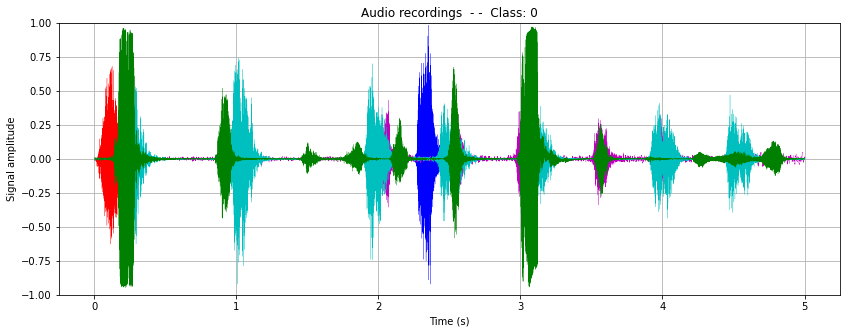

In [12]:
fig=plt.figure(figsize=(14,5))

colors=['b','r','m','c','g','k','y', 'grey', 'c', 'm', 'r' ]
for j in range(5) :

    plt.plot(time_vector, audio_data[j], color=colors[j],linewidth=0.25)


plt.ylim(-1, 1)
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.title('Audio recordings  - -  Class: '+str(labels[j]))
plt.grid()

<span style="color:#4169E1"> In this dog barking audio clips subset [0:5], one audio clip consists of 4.5 s of silence and one 0.5 s dog barking occurence. 
Other audio clips consist of several occurences of the same phenomenon. <br> <b> We reduce the length of ALL audio clips in all classes to 1.25s. </b> For retaining the clock tick fundamental frequency= 1 Hz.  

#### Plot various audio signals 

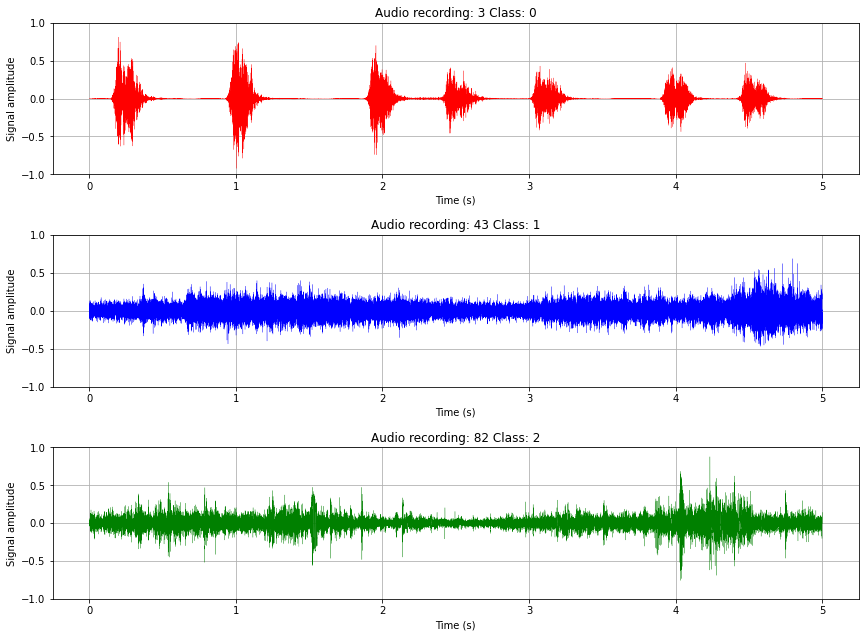

In [13]:
fig=plt.figure(figsize=(14,10))


ax = fig.add_subplot(3, 1, 1)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(time_vector,audio_data[ind[0]][0:len(time_vector)],'r',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[0])+' Class: '+str(labels[ind[0]]))
ax.grid()
#plt.show()

ax = fig.add_subplot(3, 1, 2)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(time_vector,audio_data[ind[1]][0:len(time_vector)],'b',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[1])+' Class: '+str(labels[ind[1]]))
ax.grid()
#plt.show()

ax = fig.add_subplot(3, 1, 3)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(time_vector,audio_data[ind[2]][0:len(time_vector)],'g',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[2])+' Class: '+str(labels[ind[2]]))
ax.grid()

# set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

### Reducing the size of audio signals 

<span style="color:#4169E1"> We split all audio clips in 1.25 s frames. With overlap (step= st). And we select the frame with the highest power for each audio clip. <br>
    <b>Note:</b> the dot product frames[i]\*frames[i].T is proportional to the audio signal power. 

In [14]:
from scipy import signal
from skimage import util

In [15]:
sub_sequence= fs*1.25    #  1.25 seconds of signal ! 
st=800 #  samples for sliding the window ith overlap  
audio_data_red = []

print('running...   ')
print('  ')
reduc_audio_start= time.time() 

for i in range (0,400):
    if i%99 == 0:
        print(i)
        
    frames = util.view_as_windows(audio_data[i], window_shape=(sub_sequence,), step=st) 
    optim_frame_index= np.dot(frames,frames.T).diagonal().argmax()     
        
    audio_data_red.append(frames[optim_frame_index]/np.max(frames[optim_frame_index]))   

reduc_audio_end= time.time()   
print('  ')
print(f'Audio clip size reduction computing time (s) {reduc_audio_end - reduc_audio_start:.2f}')

running...   
  
0
99
198
297
396
  
Audio clip size reduction computing time (s) 27.15


In [16]:
np.shape(frames), np.shape(audio_data_red)
time_red=len(audio_data_red[0])
time_red

27562

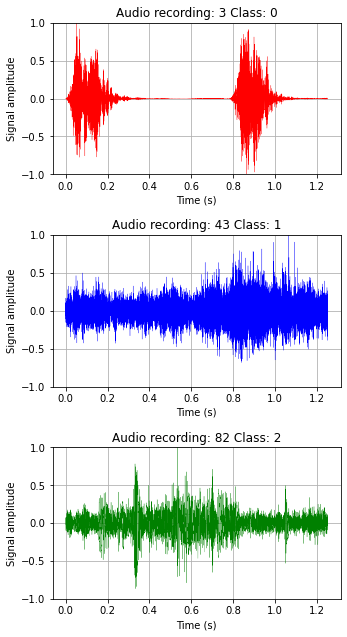

In [17]:
#save_path='dog_time.jpg'
fig=plt.figure(figsize=(5,10))
#plt.title('Figure 8 Torus')

ax = fig.add_subplot(3, 1, 1)
#  RGBA tuple  ((0,1,0,1))    Alpha is transparency from 0 to 1   
plt.plot(np.arange(time_red)/fs,audio_data_red[ind[0]][0:time_red],'r',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[0])+' Class: '+str(labels[ind[0]]))
ax.grid()
#plt.show()

ax = fig.add_subplot(3, 1, 2)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(np.arange(time_red)/fs,audio_data_red[ind[1]][0:time_red],'b',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[1])+' Class: '+str(labels[ind[1]]))
ax.grid()
#plt.show()


ax = fig.add_subplot(3, 1, 3)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(np.arange(time_red)/fs,audio_data_red[ind[2]][0:time_red],'g',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[2])+' Class: '+str(labels[ind[2]]))
ax.grid()

# set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [18]:
time_vector_red=(1/fs)*np.arange(len(audio_data_red[0]))  # time (s) vector 

## Wavelet Transforms 

<span style="color:#4169E1"> At the moment we are experimenting wavelets selection. We leave the ugly "if" statements, we will build a list of sound type/wavelet.  <br><br> 

<span style="color:#4169E1"> 
    
- <b>'cmor'</b> is the default. <br>
- <b>'cgau5'</b> and <b>'gaus5'</b> do a good job at discriminating sea waves from rain.  <br>
- <b>'cgau1'</b> (like real wavelet  "mexh") enhances the detection of impulse and gives a strong signal with narrow band harmonics. <br> 

- Class = 01-Dogbark, Label = 0
- Class = 02-Rain, Label = 1
- Class = 03-Seawaves, Label = 2
- Class = 04-Babycry, Label = 3
- Class = 05-Clocktick, Label = 4
- Class = 06-Personsneeze, Label = 5
- Class = 07-Helicopter, Label = 6
- Class = 08-Chainsaw, Label = 7
- Class = 09-Rooster, Label = 8
- Class = 10-Firecrackling, Label = 9

In [19]:
wavlist = pywt.wavelist(kind='continuous')
print('Continuous wavelets:', wavlist)
print('Continuous wavelets set includes real and complex wavelets')

Continuous wavelets: ['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']
Continuous wavelets set includes real and complex wavelets


In [20]:
import numpy as np
import pywt
dt = time_vector_red[1] - time_vector_red[0]
frequences = pywt.scale2frequency('cmor1.5-1.0', [1,128]) / dt
frequences

array([22050.      ,   172.265625])

In [21]:
# continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
# Default wavelet: Morlet complex 
waveletname='cmor1.5-1.0' # complex
#----
wavelet_mat_mag=[]
wavelet_mat_phas=[]
scales = range(1,129)
dt = time_vector_red[1] - time_vector_red[0]
#scale = tfrequency2scale('cmor1.5-1.0', frequencies)
#scale

ind=[3, 43, 82, 122, 165, 208, 245, 284, 326, 365 ]
lw=-1
for i in ind:
    lw=lw+1
 
    if lw==1 or lw==2 : 
        waveletname='cgau5'
        
    if lw==9 : 
        waveletname='cgau1'       
        
    [coefficients, frequencies] = pywt.cwt(audio_data_red[i],scales, waveletname, dt)

    
    scal_mag=20*np.log10(abs(coefficients) + 1e-12)
    scal_phas=np.unwrap(np.angle(coefficients))

    
    wavelet_mat_mag.append(scal_mag) 
    wavelet_mat_phas.append(scal_phas) 

    waveletname='cmor1.5-1.0' # complex


wavelet_mat_mag=np.array( wavelet_mat_mag)
wavelet_mat_phas=np.array( wavelet_mat_phas)

In [22]:
step_time=216 #  for time dimension = 256 
sub_time=time_vector_red[0:time_red:step_time]  # We reduce the size of the time vector !  We will lose details on scalograms ! 
#The step, here 100 depends on fs. st=100 means we downsample time every:  100/fs  second. If fs=44.1 kHz: 2.2 ms    

In [23]:
np.shape(wavelet_mat_mag),  np.shape(sub_time)

((10, 128, 27562), (128,))

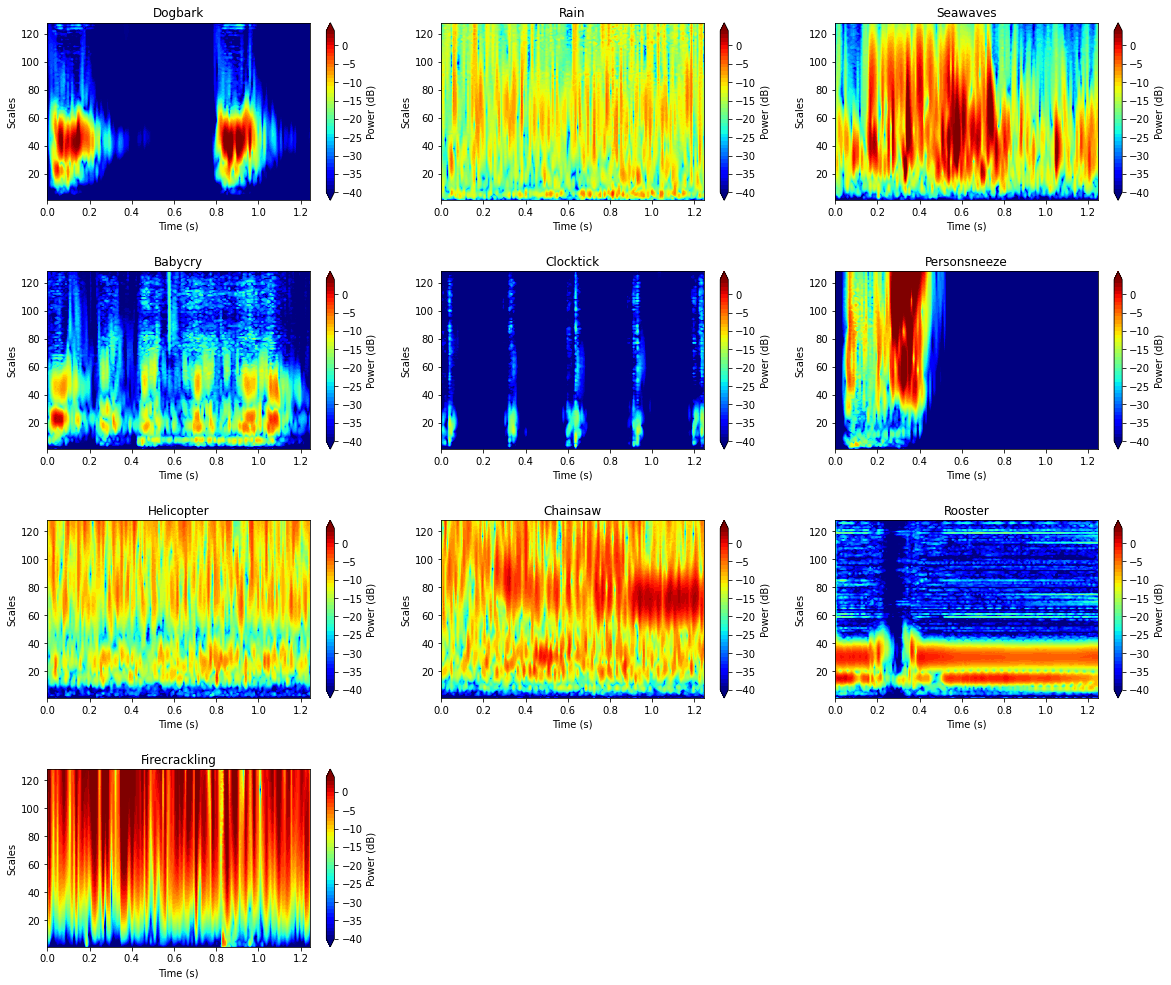

In [24]:
list_soundtype=['Dogbark', 'Rain', 'Seawaves', 'Babycry',  'Clocktick', 'Personsneeze',\
                                             'Helicopter', 'Chainsaw',  'Rooster',  'Firecrackling' ]        

period = 1. / frequencies

contourlevels = np.arange(-40,5,1)
cmap= 'jet'
#-----------------
fig=plt.figure(figsize=(20,17))
plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

for ii in range(3) :
    for jj in range(3) :
        k=3*ii + jj
        
        ax = fig.add_subplot(4, 3, k+1)
        img= ax.contourf(sub_time, scales,\
                         #np.log2(wavelet_mat[k,:,0:time_red:step_time]+1e-12),\
                         wavelet_mat_mag[k,:,0:time_red:step_time],

                         contourlevels, 
                         extend='both', 
                         cmap=cmap) 
        
        #fig.colorbar(img, ax=ax, format='%+2.0f Mag^(0.5)')
        cbar=fig.colorbar(img, ax=ax)
        cbar.set_label('Power (dB)')
        ax.set(title=list_soundtype[k])
        ax.set_xlabel('Time (s)')
        #ax.set_ylabel('Period')
        #ax.set_ylabel('Frequencies')
        ax.set_ylabel('Scales')

ax = fig.add_subplot(4, 3, 10)
img = ax.contourf(sub_time, scales, 
                  #np.log2(wavelet_mat[9,:,0:time_red:step_time]+1e-12),\
                  wavelet_mat_mag[9,:,0:time_red:step_time],

                  contourlevels, 
                  extend='both',cmap=cmap)
#cbar=fig.colorbar(img, ax=ax, format='%+2.0f)
cbar=fig.colorbar(img, ax=ax)
cbar.set_label('Power (dB)')
ax.set(title=list_soundtype[9])
ax.set_xlabel('Time (s)')
#ax.set_ylabel('Period')
#ax.set_ylabel('Frequencies')
ax.set_ylabel('Scales')

plt.show()


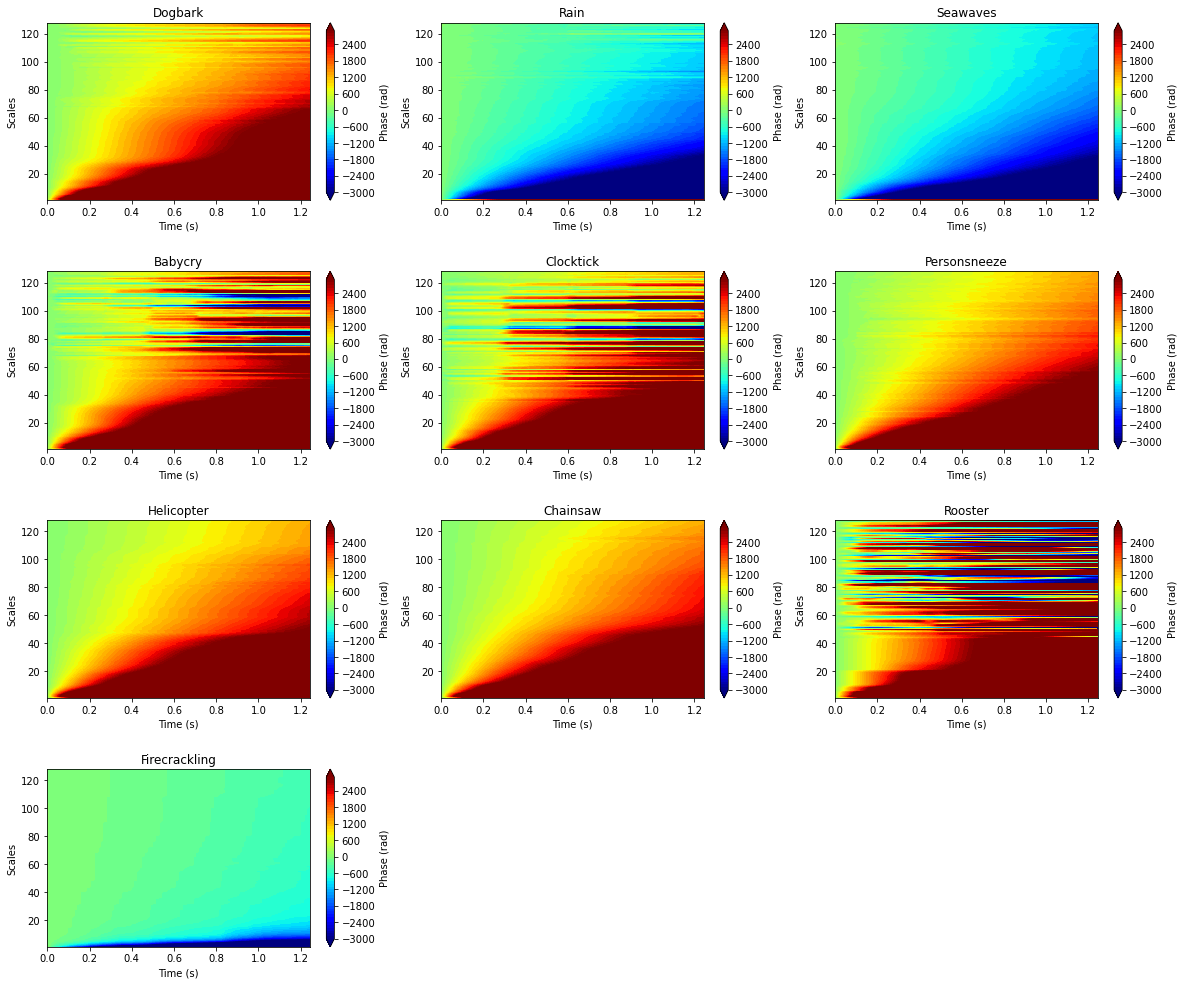

In [25]:
list_soundtype=['Dogbark', 'Rain', 'Seawaves', 'Babycry',  'Clocktick', 'Personsneeze',\
                                             'Helicopter', 'Chainsaw',  'Rooster',  'Firecrackling' ]        

period = 1. / frequencies
#contourlevels = np.arange(-25,9,1)
contourlevels = np.arange(-3000,3000,100)
cmap= 'jet'
#-----------------
fig=plt.figure(figsize=(20,17))
plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

for ii in range(3) :
    for jj in range(3) :
        k=3*ii + jj
        
        ax = fig.add_subplot(4, 3, k+1)
        img= ax.contourf(sub_time, scales,\
                         #np.log2(wavelet_mat[k,:,0:time_red:step_time]+1e-12),\
                         wavelet_mat_phas[k,:,0:time_red:step_time],

                         contourlevels, 
                         extend='both', 
                         cmap=cmap) 
        
        #fig.colorbar(img, ax=ax, format='%+2.0f Mag^(0.5)')
        cbar=fig.colorbar(img, ax=ax)
        cbar.set_label('Phase (rad)')
        ax.set(title=list_soundtype[k])
        ax.set_xlabel('Time (s)')
        #ax.set_ylabel('Period')
        #ax.set_ylabel('Frequencies')
        ax.set_ylabel('Scales')

ax = fig.add_subplot(4, 3, 10)
img = ax.contourf(sub_time, scales, 
                  #np.log2(wavelet_mat[9,:,0:time_red:step_time]+1e-12),\
                  wavelet_mat_phas[9,:,0:time_red:step_time],

                  contourlevels, 
                  extend='both',cmap=cmap)
#cbar=fig.colorbar(img, ax=ax, format='%+2.0f)
cbar=fig.colorbar(img, ax=ax)
cbar.set_label('Phase (rad)')
ax.set(title=list_soundtype[9])
ax.set_xlabel('Time (s)')
#ax.set_ylabel('Period')
#ax.set_ylabel('Frequencies')
ax.set_ylabel('Scales')

plt.show()

<span style="color:#4169E1"> We create wavelet transforms for the 400 audio clips. <br>

In [26]:
print('running...   ')
print('  ')

waveletname='cmor1.5-1.0' # complex
cwt_audio_start= time.time()   

data_cwt_mag= np.ndarray(shape=(len(audio_data_red), len(scales), len(sub_time)))
data_cwt_phas= np.ndarray(shape=(len(audio_data_red), len(scales), len(sub_time)))

for ii in range(0,len(audio_data_red)):

    if ii % 99 == 0:
        print(ii)
    

    if labels[ii]==1 or labels[ii]==2 :   # stationary
        waveletname='cgau5'
        
    if labels[ii]==9 :                    # impact 
        waveletname='cgau1'
    
    [coefficients, frequencies] = pywt.cwt(audio_data_red[ii], scales, waveletname, dt)
    

    
    scal_mag=20*np.log10(abs(coefficients) + 1e-12)
    scal_mag = np.clip(scal_mag, -40, 5)
    scal_phas=np.unwrap(np.angle(coefficients))
    scal_phas = np.clip(scal_phas, -3000, 3000)
    
    data_cwt_mag[ii,:,:] = scal_mag[:,0:time_red:step_time]   # reduction of Data ! 
    data_cwt_phas[ii,:,:] = scal_phas[:,0:time_red:step_time]   # reduction of Data ! 
    #-----------------
    #waveletname='cmorl'
    waveletname='cmor1.5-1.0' # complex
  
    
cwt_audio_end= time.time()   
print('  ')
print(f'Wavelet Transform computing time (s) {cwt_audio_end - cwt_audio_start:.2f}')

running...   
  
0
99
198
297
396
  
Wavelet Transform computing time (s) 2075.15


In [35]:
np.shape(data_cwt_mag), np.shape(data_cwt_phas), np.shape(audio_data_red)

((400, 128, 128), (400, 128, 128), (400, 27562))

<span style="color:#4169E1">  We represent scalograms as 400 vectors for <b>scaling/normalization</b>. 
We will reshape the 400 vectors into 400 "image" matrices (n_scales,-1) for Deep Learning. <br>
In all runs, the standard normalizer seems to work better than the minmaxscaler. To be confirmed.   <br>
Both options can be tested.  

In [ ]:
# MinMax scaler

In [36]:
# StandardScaler - Better !   

In [37]:
from sklearn import preprocessing
#-----------------------------------------------------------------------
data_cwt_mag_vec=data_cwt_mag.reshape(400,-1)
data_cwt_phas_vec=data_cwt_phas.reshape(400,-1)
#------------------------------------------------------------------------
transform = preprocessing.StandardScaler()
#------------------------------------------------------------------------
normalized_data_cwt_mag_vec= transform.fit_transform(data_cwt_mag_vec)
normalized_data_cwt_phas_vec= transform.fit_transform(data_cwt_phas_vec)

In [38]:
 np.min(data_cwt_mag_vec), np.max(data_cwt_mag_vec), np.min(data_cwt_phas_vec), np.max(data_cwt_phas_vec)

(-40.0, 5.0, -3000.0, 3000.0)

In [39]:
np.min(normalized_data_cwt_mag_vec), np.max(normalized_data_cwt_mag_vec), np.min(normalized_data_cwt_phas_vec), np.max(normalized_data_cwt_phas_vec)

(-1.7051277232716358, 8.42326671227655, -12.48930293189491, 13.506602074854056)

In [40]:
data_cwt_global = np.ndarray(shape=(400, len(scales)*np.shape(data_cwt_mag)[2], 2))
 
for ii in range(0,400):
    if ii % 99 == 0:
        print(ii)
    #for jj in range(0,2):
    data_cwt_global[ii,:,0]= normalized_data_cwt_mag_vec[ii,:]
    data_cwt_global[ii,:,1]= normalized_data_cwt_phas_vec[ii,:]

0
99
198
297
396


In [41]:
np.shape(normalized_data_cwt_mag_vec)

(400, 16384)

In [42]:
labels=np.array(labels,dtype=int)
#labels

## Convolutional Neural Network 

<span style="color:#4169E1"> Normalized Scalograms are 2D-arrays (matrices). 2 x 128x128 matrices. Magnitude and Phase. We reshape accordingly after normalization. 

In [43]:
features_cwt_CNN = np.reshape(data_cwt_global,(-1,len(scales), np.shape(data_cwt_mag)[2],2))
features_cwt_CNN.shape

(400, 128, 128, 2)

In [4]:
ind=[3, 43, 82, 122, 165, 208, 245, 284, 326, 365 ] # previously selected audio clips

Text(0.5, 1.0, 'Rain - Wavelet Transform Phase')

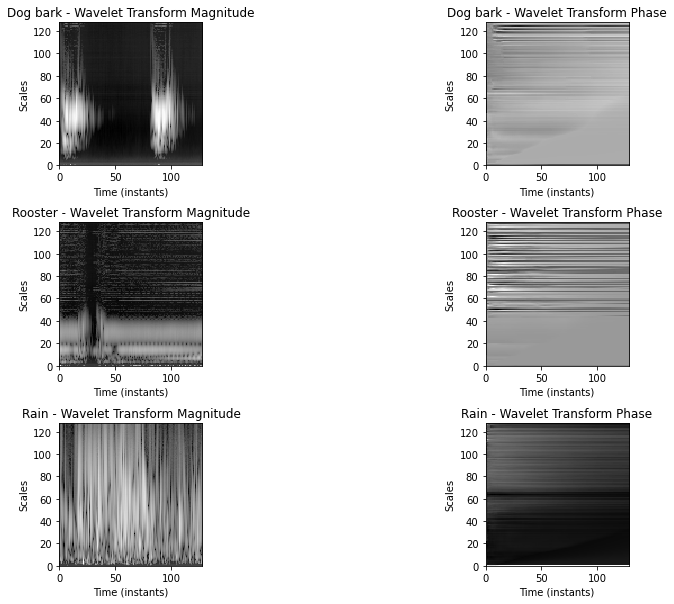

In [45]:
#plt.imshow(sub_time, scales, features_cwt_CNN[122,::-1,:,0] ,cmap='gray')
fig=plt.figure(figsize=(14,10))
plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

ax = fig.add_subplot(3, 2, 1)
plt.imshow(features_cwt_CNN[3,::-1,:,0] ,cmap='gray',interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (instants)')
ax.set_ylabel('Scales')
ax.set_title('Dog bark - Wavelet Transform Magnitude')
ax = fig.add_subplot(3, 2, 2)
plt.imshow(features_cwt_CNN[3,::-1,:,1] ,cmap='gray',interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (instants)')
ax.set_ylabel('Scales')
ax.set_title('Dog bark - Wavelet Transform Phase')

ax = fig.add_subplot(3, 2, 3)
plt.imshow(features_cwt_CNN[326,::-1,:,0] ,cmap='gray',interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (instants)')
ax.set_ylabel('Scales')
ax.set_title('Rooster - Wavelet Transform Magnitude')
ax = fig.add_subplot(3, 2, 4)
plt.imshow(features_cwt_CNN[326,::-1,:,1] ,cmap='gray',interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (instants)')
ax.set_ylabel('Scales')
ax.set_title('Rooster - Wavelet Transform Phase')


ax = fig.add_subplot(3, 2, 5)
plt.imshow(features_cwt_CNN[82,::-1,:,0] ,cmap='gray',interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (instants)')
ax.set_ylabel('Scales')
ax.set_title('Rain - Wavelet Transform Magnitude')
ax = fig.add_subplot(3, 2, 6)
plt.imshow(features_cwt_CNN[82,::-1,:,1] ,cmap='gray',interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (instants)')
ax.set_ylabel('Scales')
ax.set_title('Rain - Wavelet Transform Phase')

In [46]:
ylabels=keras.utils.to_categorical(labels, num_classes=10, dtype='float32')

In [70]:
ylabels[41]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<span style="color:#4169E1"> Train/Test split: 80/20%. <br>
We shuffle the dataset and keep the same <code>random_state</code> for all runs when optimizing CNN parameters <br> And we stratify the sets based on labels. In this case, in both sets, we should have the same number of features/labels in each sound class.     

In [78]:
(train_X,test_X,train_y,test_y)= train_test_split(features_cwt_CNN, ylabels, test_size=0.2, stratify=ylabels, random_state=5)

In [79]:
np.shape(train_X), np.shape(train_y), np.shape(test_X), np.shape(test_y)

((320, 128, 128, 2), (320, 10), (80, 128, 128, 2), (80, 10))

In [80]:
train_X.shape[1:]

(128, 128, 2)

##### <b> CNN Parameters: </b>

<span style="color:#4169E1"> Quick discussion about parameters:

<span style="color:#4169E1">
    
- number of layers: 5 hidden layers.
- number of neurons per layers: generally we go with $2^n$ nodes per increasing number of layer. We started with small numbers and optimized the number of nodes and layers. 32, 64, 128, 256, 256 proved sufficient.   
- "image" matrices are 128x128 grayscale images. Still relatively small. (3,3) filters are sufficient. We let Stride and convolution Dilation rate at default values: (1,1). 
- optimizer: we tested Stochastic Gradient Descent (SGD) and Adam with different parameters. Adam was always superior. AMSGrad option may have further improved convergence.  
- overfitting was an issue initially: drop-out, with probability threshold between 0.1 and 0.2 prevented overfitting while converging close to maximum accuracy. With current implementation no overfitting occurs (hence no drop-out).   
- activation functions: both "ReLU" or "LeakyReLU (alpha:0.1-0.2") work. A slight advantage with ReLU.  

In [81]:
from keras.layers import LeakyReLU

model = Sequential()
#
model.add(Conv2D(32, (3, 3), dilation_rate=(1,1), input_shape=train_X.shape[1:]))
#model.add(Conv2D(64, (5, 5), dilation_rate=(1,1), input_shape=train_X.shape[1:]))
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))
#
#
model.add(Conv2D(64, (3, 3), dilation_rate=(1,1)))
#model.add(Conv2D(64, (5, 5), dilation_rate=(1,1))
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))


#model.add(Conv2D(256, (3, 3),dilation_rate=(1,1) )   )
model.add(Conv2D(128, (3, 3),dilation_rate=(1,1) )   )
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))
#
#model.add(Conv2D(512, (3, 3), dilation_rate=(1,1)))
model.add(Conv2D(256, (3, 3),dilation_rate=(1,1) )   )
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))
#
#---- fully connected layer
model.add(Flatten())      # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(256))  
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.1))

#--- Softmax classifier
#
model.add(Dense(10))
model.add(Activation('softmax'))
#------ Otimizers
opt=tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=True,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    name='Adam')
#sgd = optimizers.SGD(learning_rate=0.0001, decay=1e-5, momentum=0.8, nesterov=True)
#sgd = optimizers.SGD(learning_rate=0.001, decay=1e-3, momentum=0.8, nesterov=True)
sgd = optimizers.SGD(learning_rate=0.00025, decay=1e-4, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              #optimizer=sgd,
              optimizer=opt,
              metrics=['accuracy'])

In [82]:
accuracy_threshold=0.93

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > accuracy_threshold):   
            print("\nReached %2.2f%% accuracy, we stop training!!" %(accuracy_threshold*100))   
            self.model.stop_training = True

In [83]:
custom_early_stopping = myCallback()

In [84]:
history = model.fit(
    train_X, 
    train_y, 
    epochs=40, 
    steps_per_epoch=len(train_X)//16,
    #validation_split=0.2, 
    validation_data=(test_X, test_y),
    batch_size=10, 
    #verbose=2,
    callbacks=[custom_early_stopping]
)

Epoch 1/40
20/20 [==============================] - 13s 520ms/step - loss: 2.0705 - accuracy: 0.2550 - val_loss: 1.7079 - val_accuracy: 0.4000
Epoch 2/40
20/20 [==============================] - 10s 506ms/step - loss: 1.4956 - accuracy: 0.3550 - val_loss: 1.2470 - val_accuracy: 0.5375
Epoch 3/40
20/20 [==============================] - 10s 512ms/step - loss: 1.1264 - accuracy: 0.4900 - val_loss: 1.0909 - val_accuracy: 0.6000
Epoch 4/40
20/20 [==============================] - 11s 556ms/step - loss: 0.9777 - accuracy: 0.5850 - val_loss: 0.7362 - val_accuracy: 0.7125
Epoch 5/40
20/20 [==============================] - 11s 557ms/step - loss: 0.7301 - accuracy: 0.7750 - val_loss: 0.6567 - val_accuracy: 0.7750
Epoch 6/40
20/20 [==============================] - 10s 503ms/step - loss: 0.7256 - accuracy: 0.7200 - val_loss: 0.6428 - val_accuracy: 0.7625
Epoch 7/40
20/20 [==============================] - 10s 504ms/step - loss: 0.6059 - accuracy: 0.7500 - val_loss: 0.5913 - val_accuracy: 0.7750

In [85]:
test_loss, test_acc = model.evaluate(test_X, test_y) 

3/3 [==============================] - 2s 284ms/step - loss: 0.2512 - accuracy: 0.9375


In [86]:
predictions= model.predict(x=test_X, batch_size=10)

8/8 [==============================] - 1s 144ms/step


In [87]:
predictions=predictions + 1e-09

In [88]:
test_y=test_y+1e-09

In [98]:
list_sound=['DogBark', 'Rain', 'SeaWaves', 'BabyCry',  'ClockTick', 'PersonSneeze',\
                                             'Helico', 'Chainsaw',  'Rooster',  'FireCrackling' ] 

print(classification_report(test_y.argmax(axis=1), predictions.argmax(axis=1), target_names= list_sound) )
#test_y.argmax(), predictions.argmax()

               precision    recall  f1-score   support

      DogBark       1.00      0.88      0.93         8
         Rain       0.89      1.00      0.94         8
     SeaWaves       1.00      0.88      0.93         8
      BabyCry       0.89      1.00      0.94         8
    ClockTick       1.00      1.00      1.00         8
 PersonSneeze       1.00      1.00      1.00         8
       Helico       0.88      0.88      0.88         8
     Chainsaw       0.88      0.88      0.88         8
      Rooster       0.88      0.88      0.88         8
FireCrackling       1.00      1.00      1.00         8

     accuracy                           0.94        80
    macro avg       0.94      0.94      0.94        80
 weighted avg       0.94      0.94      0.94        80



In [99]:
LB=np.unique(labels)
LB

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

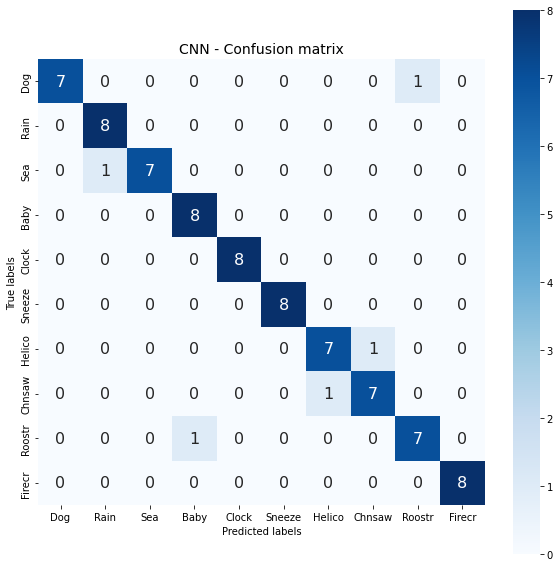

In [100]:
list_sound=['Dog', 'Rain', 'Sea', 'Baby',  'Clock', 'Sneeze',\
                                             'Helico', 'Chnsaw',  'Roostr',  'Firecr' ] 
fig=plt.figure(figsize=(10,10))
plot_confusion_matrix(test_y.argmax(axis=1), predictions.argmax(axis=1),list_sound)
plt.title("CNN - Confusion matrix", fontsize=14)
plt.savefig("CNN_Wavelet_ConfusionMatrix_figure01.png")
plt.show()

<span style="color:#4169E1">   There is some confusion: <br>
- in the non-stationary category resultng from vibration of tract, or nasal vibration:  dogbark, rooster, person sneeze... 
- in the impulsive noise category: clocktick and firecrackling.

We could improve this results, with higher definition mel-spectrogram. Or maybe high definition spectrograms. 

- Class = 01-Dogbark, Label = 0
- Class = 02-Rain, Label = 1
- Class = 03-Seawaves, Label = 2
- Class = 04-Babycry, Label = 3
- Class = 05-Clocktick, Label = 4
- Class = 06-Personsneeze, Label = 5
- Class = 07-Helicopter, Label = 6
- Class = 08-Chainsaw, Label = 7
- Class = 09-Rooster, Label = 8
- Class = 10-Firecrackling, Label = 9

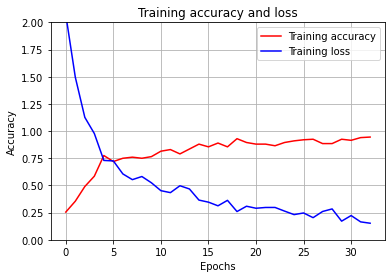

In [92]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs,loss, 'b', label='Training loss')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training accuracy and loss')
plt.legend(loc=0)
plt.ylim([0,2])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.grid()
plt.show()

In [93]:
def summarize_diagnostics(history):
 # plot loss
    epochs = range(len(acc))
    fig=plt.figure(figsize=(8,6))
    plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)
    
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim([0,1.5])
    plt.plot(epochs, history.history['loss'], color='blue', label='Train')
    plt.plot(epochs, history.history['val_loss'], color='red', label='Test')
    plt.legend()
    plt.grid()
     # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim([0,1.])
    plt.plot(history.history['accuracy'], color='c', label='Train')
    plt.plot(history.history['val_accuracy'], color='crimson', label='Test')
    plt.legend()
    plt.grid()
     # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #plt.savefig(filename + '_plot.png')
    #plt.close()

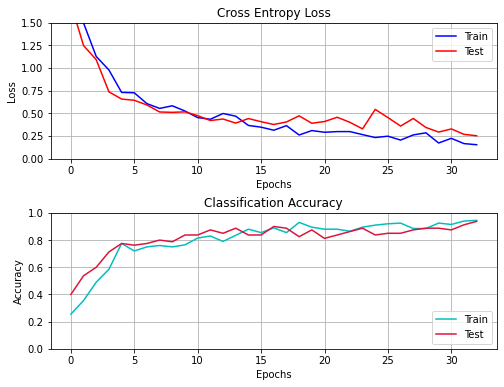

In [94]:
summarize_diagnostics(history)

In [95]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      608       
                                                                 
 activation_12 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_13 (Activation)  (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [97]:
# save model
#model.save('Model_Wavelet_Phase_22kHz_v4.h5')